# Módulo  - Estatística II

## Projeto - Análise do dataset "Wine Quality"

### Equipe do Projeto

#### - Adriana Miceli
#### - Luisa Callegari
#### - Magnovaldo Carneiro
#### - Mariana de Cassia
#### - Marilia Costa

### Instruções

- O projeto deverá ser entregue até dia 16/08;
- O projeto poderá ser feito __individualmente__ ou em __grupos__ de até __5 pessoas__;

### Informações sobre o projeto

Dataset (conjunto de dados a ser utilizado) está disponível em:
    https://archive.ics.uci.edu/ml/datasets/Wine+Quality

Data Set Information:

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: [Web Link] or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.


Attribute Information:

Input variables (based on physicochemical tests): <br>
- 1 - fixed acidity
- 2 - volatile acidity
- 3 - citric acid
- 4 - residual sugar
- 5 - chlorides
- 6 - free sulfur dioxide
- 7 - total sulfur dioxide
- 8 - density
- 9 - pH
- 10 - sulphates
- 11 - alcohol

Output variable (based on sensory data): <br>
- 12 - quality (score between 0 and 10)

Para ajudar no desenvolvimento do projeto, vamos separar o projeto em algumas seções, conforme descritas a seguir:

- __Preparação dos Dados e Verificação de Consistência__: Neste tópico deve ser feita a verificação da consistência dos dados e caso necessário efetuar eventuais modificações na base de dados. Alguns dos procedimentos que podemos fazer aqui são: Remoção e/ou tratamento de valores faltantes, remoção de duplicatas, ajustes dos tipos de variáveis, análise de _outliers_ entre outras;

<br>

- __Análise Exploratória dos Dados__: Para fazermos a modelagem, precisamos conhecer muito bem os dados que estamos trabalhando. Por isso, nesta parte do projeto vocês desenvolveram an´laises e gráficos a respeito dos dados que estão utilizando. Tente tirar ao máximo informaç~eos sobre as variáveis em si e suas relações com as demais;

<br>

- __Modelagem dos Dados__: Nesta parte, o projeto será dividido em dois modelos, um de Regressão Linear e outra de Regressão Logística. No __primeiro módulo__, o objetivo será modelar um regressor que estime o valor da qualidade do vinho (para este primeiro modelo, desconsidere a variável `quality`). No __segundo modelo__, utilizando como variável resposta (_target_) a variável `quality`, modelar um classificador que separe entre vinhos bons e ruins (para isto, considere `quality` >= 6 como um vinho bom). Além disso, avaliar a necessidade ou não de aplicar regularizações no modelo.

<br>

- __Conclusões sobre o Projeto__: Para finalizar, descreva as suas conclusões sobre o desenvolvimento do modelo e os resultados obtidos.

<br>

__Importante:__ Façam as análise em ambas as bases `winequality-red.csv` e `winequality-white.csv` separadamente, e depois misturem os dados para uma nova análise (no total serão 3 análises a serem feitas). Qual o impacto nas análises de misturar os dados na resultado da análise?

<br>

A entrega deve ser feita em um arquivo _Jupyter Notebook_ em aba que será disponibilizada no Class, contendo todo o desenvolvimento do projeto e o nome(s) do(s) aluno(s).

## Módulo 1 - Whine-Red
### Regressão Linear

##### Limpeza e tratamento + Análise Exploratória dos dados

In [45]:
# Importando bibliotecas importantes
# Análise de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# Pré-Processamento de dados
# Normalização dos dados (garantindo que todos tenham a mesma "grandeza")
from sklearn.preprocessing import StandardScaler

#Processamento do modelo
from sklearn.model_selection import train_test_split

#Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression 

# Análise do modelo
import sklearn.metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [46]:
# Carregando o CSV
r_wine = pd.read_csv('winequality-red.csv', sep=';')

# Mostrar as primeiras linhas
r_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [47]:
# Algumas estatísticas interessantes sobre o dataset
r_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [48]:
r_wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [49]:
# Percentual de valores nulos
(r_wine.isna().sum()/len(r_wine))*100

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

In [50]:
# Visualizando linhas duplicadas
r_wine[r_wine.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [51]:
# Considerando que seria muito difícil dois ou mais vinhos apresentarem 
# exatamente as mesmas características químicas, uma opção seria excluir as linhas duplicadas.

# Verificando percentual de linhas duplicadas
print('Total de Linhas: ', r_wine.shape[0])
print('Total de Linhas duplicadas: ', r_wine[r_wine.duplicated()].shape[0])
print('Percentual de Linhas duplicadas: ', (r_wine[r_wine.duplicated()].shape[0]/r_wine.shape[0])*100)

print('Como o valor percentual de linhas duplicadas é 15% optamos por manter na tabela')

Total de Linhas:  1599
Total de Linhas duplicadas:  240
Percentual de Linhas duplicadas:  15.0093808630394
Como o valor percentual de linhas duplicadas é 15% optamos por manter na tabela


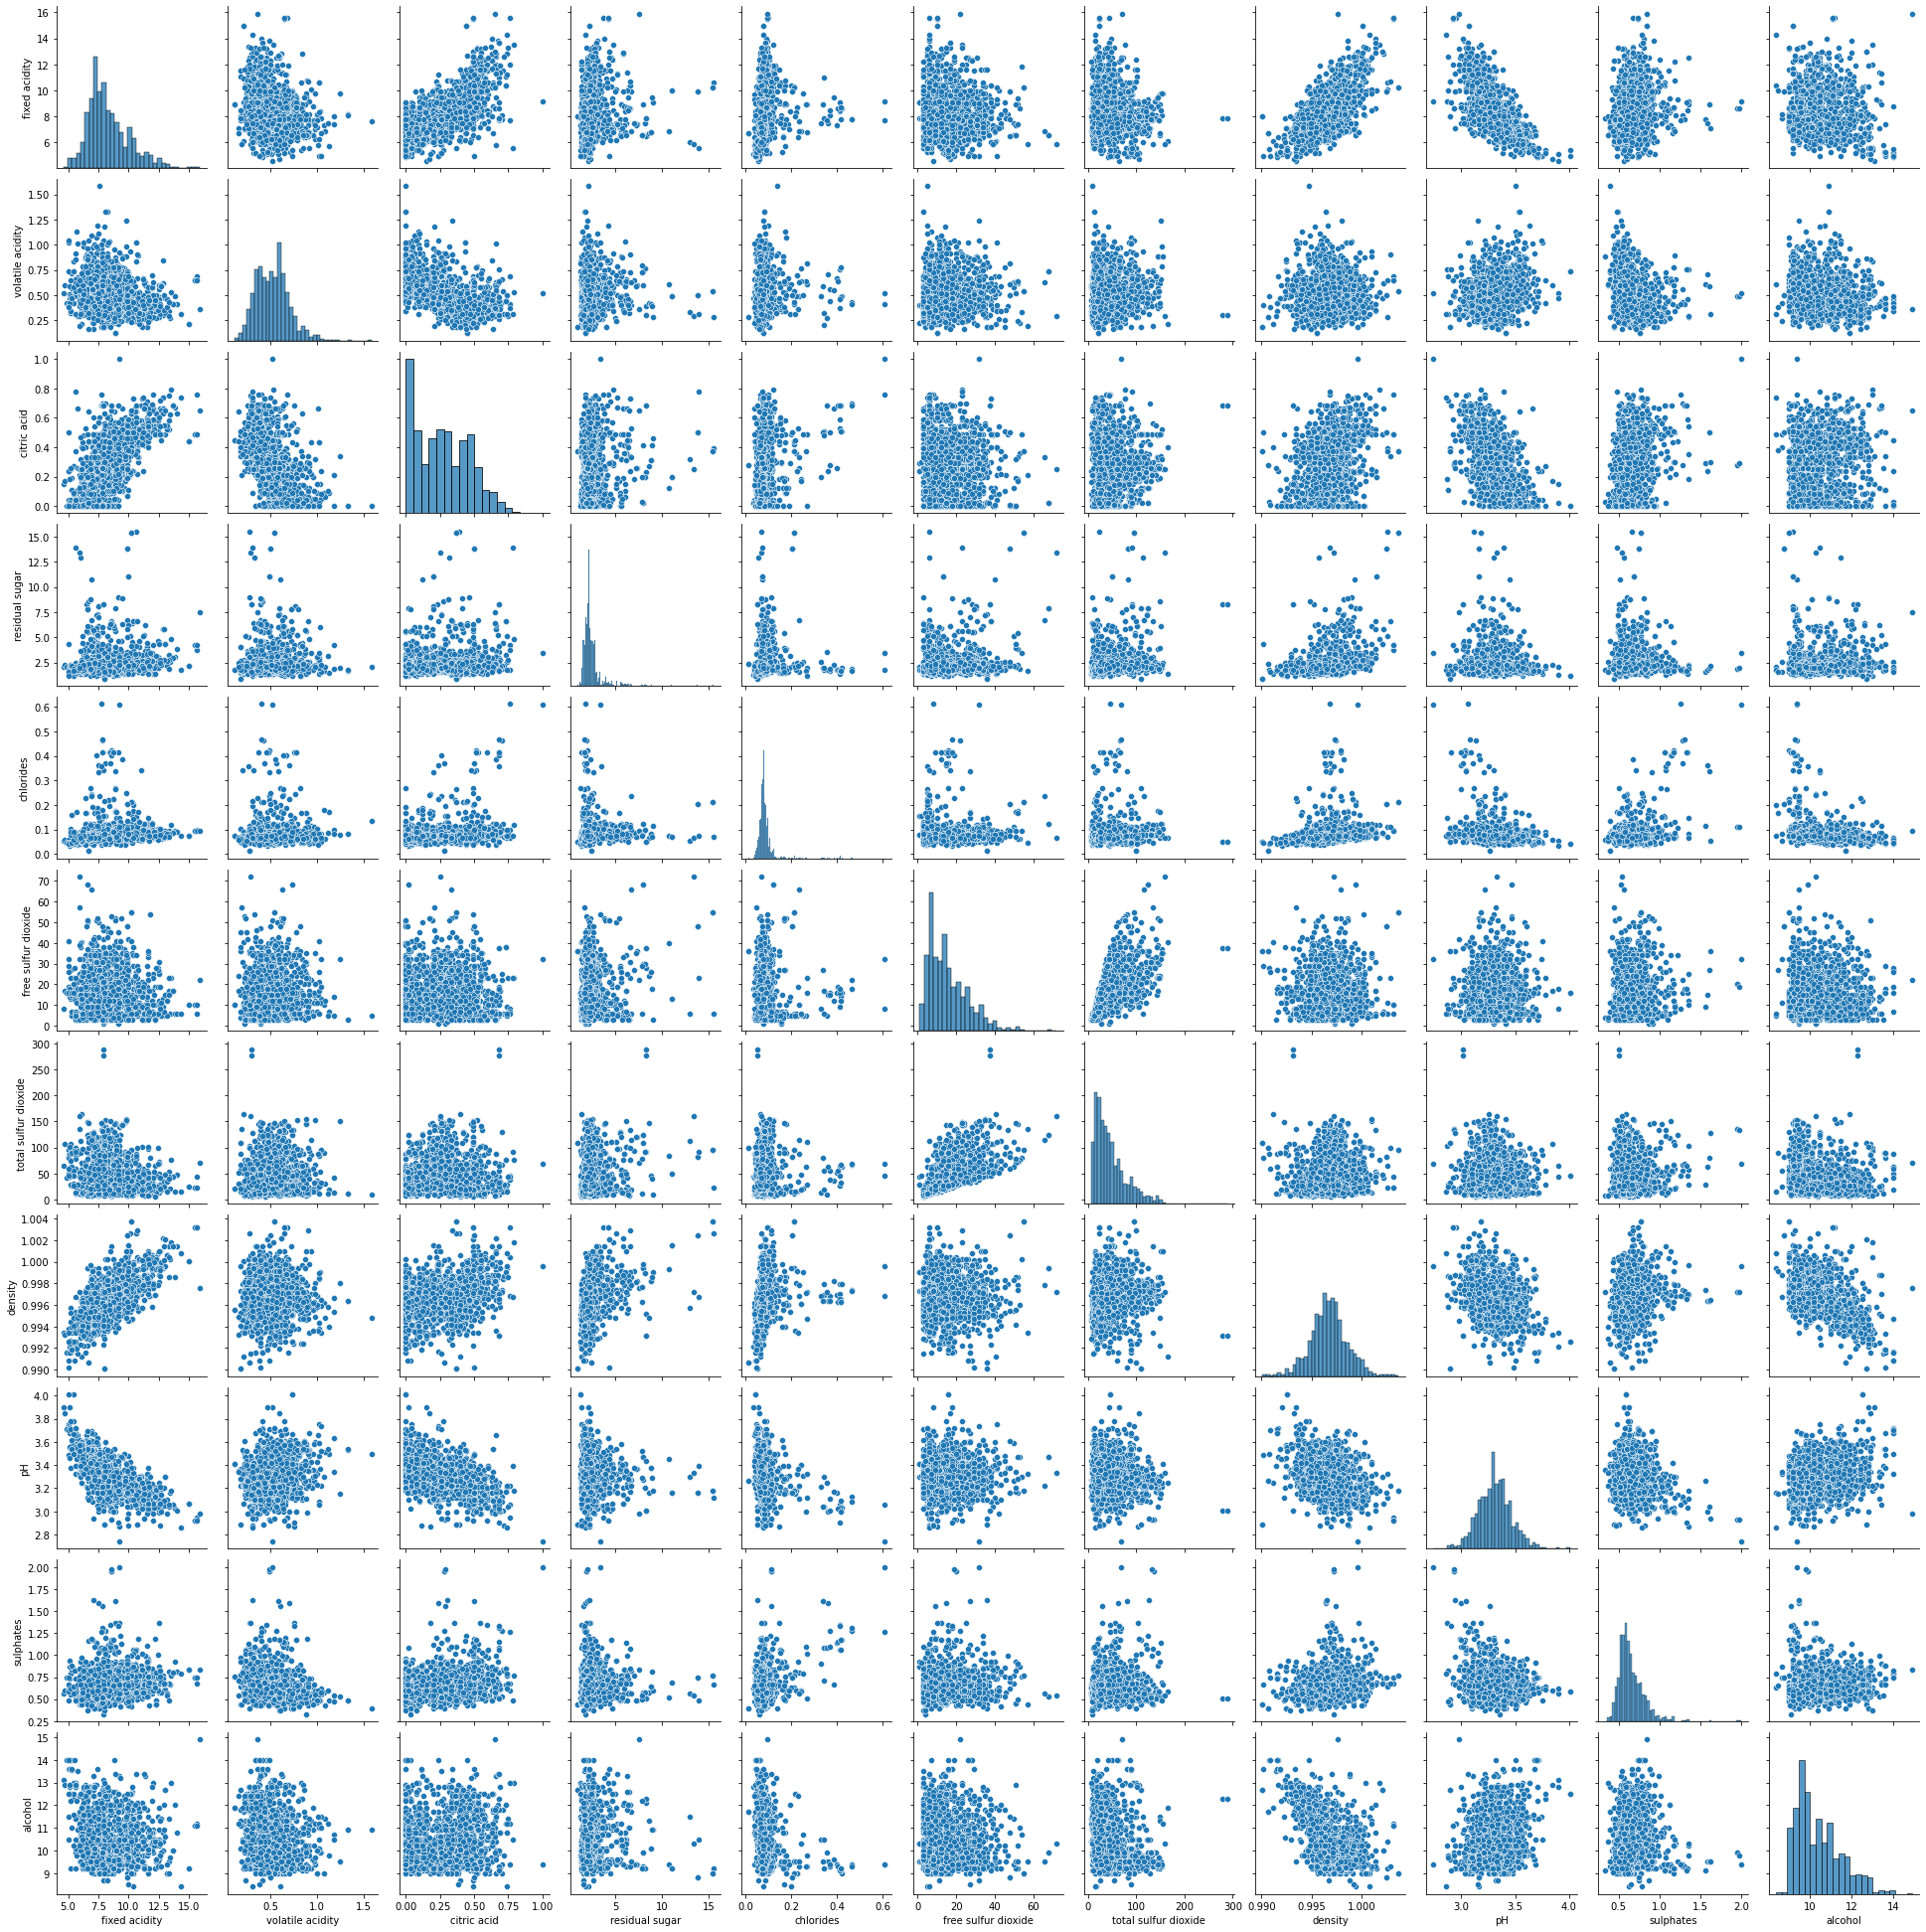

In [52]:
# Paiplot sem a variável de qualidade
sns.pairplot(r_wine, vars=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'])

<AxesSubplot:>

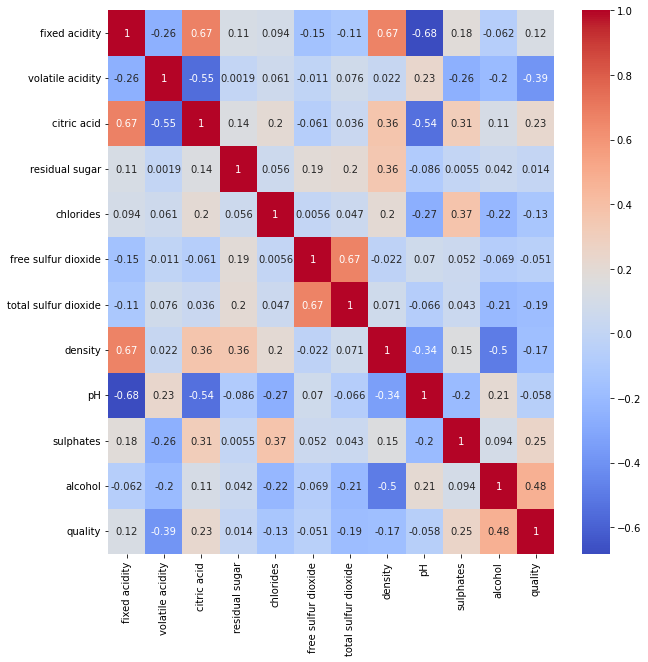

In [53]:
# Correlação entre variáveis
plt.figure(figsize=(10,10))
sns.heatmap(r_wine.corr(), cmap='coolwarm', annot=True)

Através da análise do gráfico de correlação, percebemos que o fixed acidity correlaciona-se com duas principais variáveis:
* density = quanto maior a densidade, maior o fixed acidity
* pH = quanto maior o pH, menor o fixed acidity do vinho 

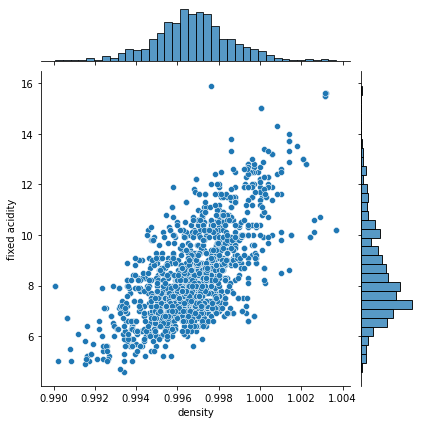

In [54]:
sns.jointplot(x = 'density', y='fixed acidity', data=r_wine)

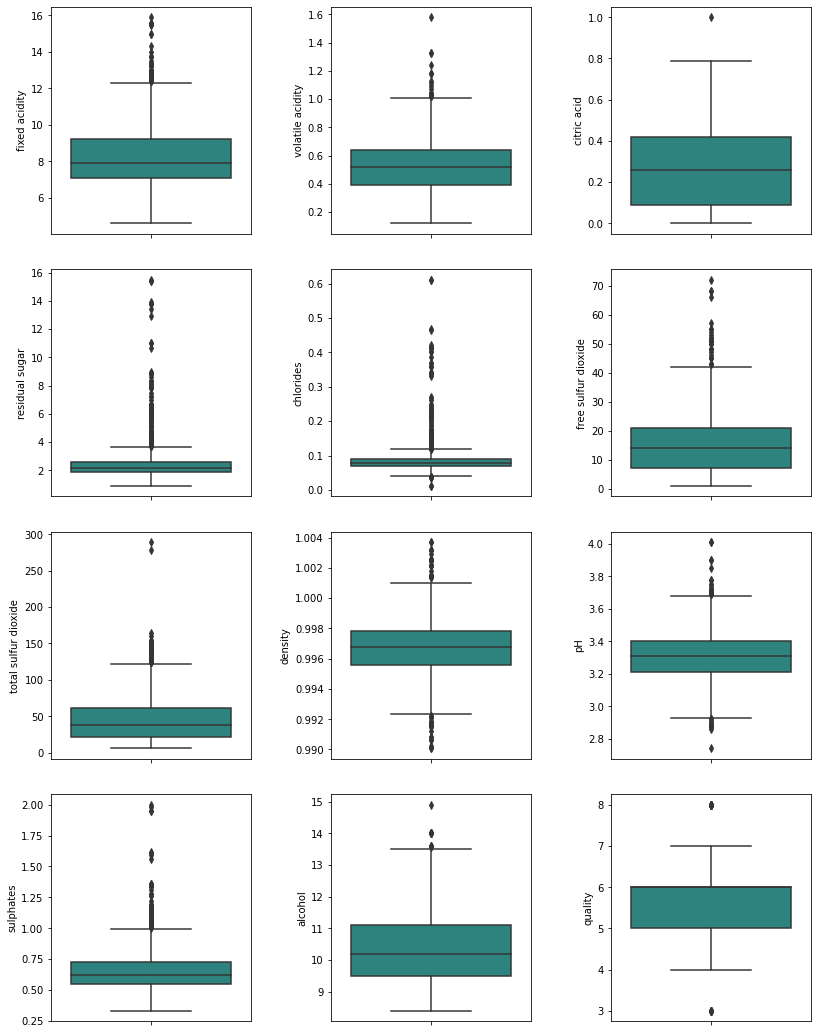

In [55]:
# Análise de Outliers por variável
fig, ax = plt.subplots(4, 3, figsize=(12,15))
sns.boxplot(data=r_wine, y='fixed acidity', ax=ax[0,0], palette='viridis')
sns.boxplot(data=r_wine, y='volatile acidity', ax=ax[0,1], palette='viridis')
sns.boxplot(data=r_wine, y='citric acid' , ax=ax[0,2], palette='viridis')
sns.boxplot(data=r_wine, y='residual sugar', ax=ax[1,0], palette='viridis')
sns.boxplot(data=r_wine, y='chlorides', ax=ax[1,1], palette='viridis')
sns.boxplot(data=r_wine, y='free sulfur dioxide', ax=ax[1,2], palette='viridis')
sns.boxplot(data=r_wine, y='total sulfur dioxide', ax=ax[2,0], palette='viridis')
sns.boxplot(data=r_wine, y='density', ax=ax[2,1], palette='viridis')
sns.boxplot(data=r_wine, y='pH', ax=ax[2,2], palette='viridis')
sns.boxplot(data=r_wine, y='sulphates', ax=ax[3,0], palette='viridis')
sns.boxplot(data=r_wine, y='alcohol', ax=ax[3,1], palette='viridis')
sns.boxplot(data=r_wine, y='quality', ax=ax[3,2], palette='viridis')

fig.tight_layout(pad=3)  # distância entre cada gráfico

##### Criação do modelo de Regressão Linear:

In [56]:
# Separando em X e y
X = r_wine.drop('quality', axis=1)
y = r_wine['quality']

In [57]:
# Separando os dados em dados de treino e dados de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [58]:
# Instanciar a função
scaler = StandardScaler()

In [59]:
# Aplicando a normalização
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [60]:
# Instanciar o modelo
model = LinearRegression()

In [61]:
# Treinar o modelo
model.fit(X_train_std, y_train)

LinearRegression()

In [62]:
# Gerando as predições
y_pred_rl = model.predict(X_test_std)

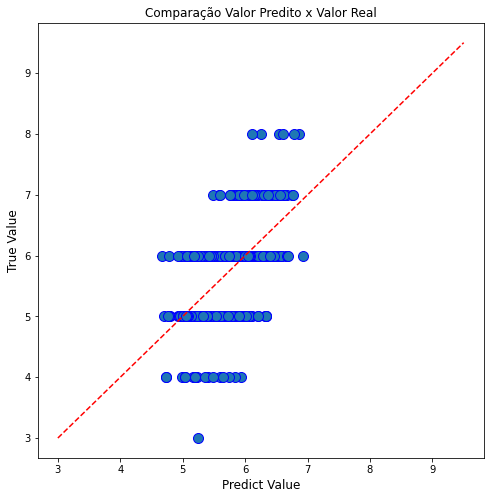

In [63]:
# Gráfico para comparar os Valores Reais com os Preditos
fig = plt.figure(figsize=(8,8))
l = plt.plot(y_pred_rl, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.title('Comparação Valor Predito x Valor Real', fontsize=12)
plt.ylabel("True Value", fontsize=12)
plt.xlabel("Predict Value", fontsize=12)

# mostra os valores preditos e originais
x1 = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
y1 = x1
plt.plot(x1, y1, 'r--')
plt.show()

In [64]:
# Feature Importance: Definindo variáveis que são mais relevantes
coefs = model.coef_
coefs

# Criando listas auxiliares
list_columns = X_train.columns
list_feature = []
list_score = []

# Feature e Coeficiente
for i, v in enumerate(coefs):
    list_feature.append(list_columns[i])
    list_score.append(v)

# Cria um dicionario das Features
dictionary = {'Features': list_feature,
              'Scores':   list_score}

# Mostra a tabela ordenada
df_feat_import = pd.DataFrame(dictionary)

# Ordenando Scores
df_feat_import = df_feat_import.sort_values(by = ['Scores'], ascending = False)
df_feat_import

,Features,Scores
10,alcohol,0.309300
9,sulphates,0.139940
5,free sulfur dioxide,0.046726
0,fixed acidity,0.040208
3,residual sugar,0.011043
7,density,-0.026193
2,citric acid,-0.048433
8,pH,-0.049136
4,chlorides,-0.078863
6,total sulfur dioxide,-0.107780


- Percebemos que de todas as variáveis, alcohol é a que tem mais influencia no valor da qualidade do vinho. 
- Ao aumentar 1 unidade do alcohol, aumentaríamos 0,3039300 na variável de qualidade
- Assim como se aumentarmos uma unidade no valor de volatile acidity, diminuiríamos 0,200065 no valor da qualidade

##### Análise de variáveis desinteressantes para o modelo - Regularização
A Regularização remove os ruídos e deixa o modelo mais simples, generalizável e com melhor performance.

In [65]:
# Ridge 

# Instancia o modelo
ridge = Ridge()

# Fit dos dados
ridge.fit(X_train_std, y_train)

# Para os dados novos, vamos definir a predição para a base de teste
y_pred_ridge = ridge.predict(X_test_std)

In [66]:
# Lasso

# Instancia o modelo
lasso = Lasso(alpha = 5)

# Fit dos dados
lasso.fit(X_train_std, y_train)

# Para os dados novos, vamos definir a predição para a base de teste
y_pred_lasso = lasso.predict(X_test_std)

In [67]:
#ElasticNet

# Instancia o modelo
en = ElasticNet()

# Fit dos dados
en.fit(X_train_std, y_train)

# Para os dados novos, vamos definir a predição para a base de teste
y_pred_en = en.predict(X_test_std)

In [68]:
# Comparando os R2s
print('R2 - Regressão Linear: ', np.round(r2_score(y_test, y_pred_rl), 4))
print('R2 - Ridge:            ', np.round(r2_score(y_test, y_pred_ridge), 4))
print('R2 - Lasso:            ', np.round(r2_score(y_test, y_pred_lasso), 4))
print('R2 - Elastic-Net:      ', np.round(r2_score(y_test, y_pred_en), 4))

R2 - Regressão Linear:  0.3514
R2 - Ridge:             0.3514
R2 - Lasso:             -0.0034
R2 - Elastic-Net:       -0.0034


In [69]:
# Comparando o MSE
print('MSE - Regressão Linear: ', np.round(mean_squared_error(y_test, y_pred_rl), 4))
print('MSE - Ridge:            ', np.round(mean_squared_error(y_test, y_pred_ridge), 4))
print('MSE - Lasso:            ', np.round(mean_squared_error(y_test, y_pred_lasso), 4))
print('MSE - Elastic-Net:      ', np.round(mean_squared_error(y_test, y_pred_en), 4))

MSE - Regressão Linear:  0.4112
MSE - Ridge:             0.4112
MSE - Lasso:             0.6362
MSE - Elastic-Net:       0.6362


In [70]:
# comparando o MAE
print('MAE - Regressão Linear: ', np.round(mean_absolute_error(y_test, y_pred_rl), 4))
print('MAE - Ridge:            ', np.round(mean_absolute_error(y_test, y_pred_ridge), 4))
print('MAE - Lasso:            ', np.round(mean_absolute_error(y_test, y_pred_lasso), 4))
print('MAE - Elastic-Net:      ', np.round(mean_absolute_error(y_test, y_pred_en), 4))

MAE - Regressão Linear:  0.5134
MAE - Ridge:             0.5134
MAE - Lasso:             0.6779
MAE - Elastic-Net:       0.6779


##### Criação do modelo de Regressão Logística:

In [71]:
# Criando a coluna Target com base no valor da qualidade do vinho
# Maior ou igual a 6 = 1
# Abaixo da 6 = 0

r_wine_rlog = r_wine.copy()

valor_ref = 6
r_wine_rlog['Target'] = np.where(r_wine['quality']>=valor_ref, 1, 0)
r_wine_rlog.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


(-1.1085285210394051,
 1.1061065961102607,
 -1.1745640226149021,
 1.1133466932090368)

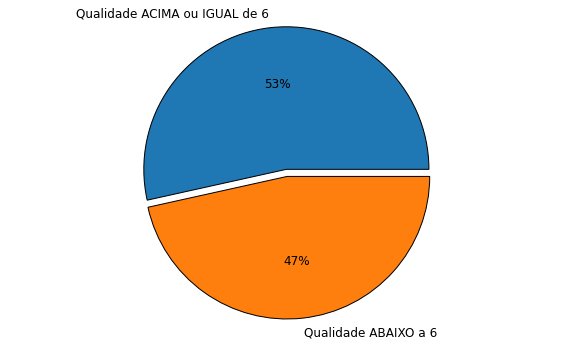

In [72]:
# Verificando a distribuição do target
fig, ax = plt.subplots(figsize=(10,6))

labels = ["Qualidade ACIMA ou IGUAL de 6", "Qualidade ABAIXO a 6", ]
sizes = r_wine_rlog['Target'].value_counts()

plt.pie(sizes, explode = [0, 0.05], labels = labels,
        autopct = '%1.0f%%', shadow = False, wedgeprops = {'ec': 'black'},
        textprops = {'fontsize': 12}
)

plt.axis('equal')

In [73]:
# Criando as variáveis com as features e o target: X(feature) e Y(target)
# O quanto X influencia em Y
# Poderia ser X = data.drop("sports",axis=1), mas não é aplicável nesse caso
# Separando em X e y
X_rlog = r_wine_rlog.drop(['Target', 'quality'], axis=1)
y_rlog = r_wine_rlog['Target']

In [74]:
# Separando os dados em dados de treino e dados de teste
X_rlog_train, X_rlog_test, y_rlog_train, y_rlog_test = train_test_split(X_rlog, y_rlog, test_size = 0.3, random_state = 42)

In [75]:
# Instanciar a normalização
scaler = StandardScaler()

In [76]:
# Aplicação da Normalização
X_rlog_train_std = scaler.fit_transform(X_rlog_train)
X_rlog_test_std = scaler.transform(X_rlog_test)

In [77]:
# Instanciando a classe do estimador
model = LogisticRegression()

In [78]:
# Fit do Modelo
model.fit(X_rlog_train_std, y_rlog_train)

LogisticRegression()

In [79]:
# Predict do Modelo
y_rlog_pred = model.predict(X_rlog_test_std)

In [80]:
# Matriz de confusão
confusion_matrix = confusion_matrix(y_rlog_test, y_rlog_pred)
print(confusion_matrix)

[[157  56]
 [ 71 196]]


In [81]:
# Cálculo da Acurácia - Indica uma performance geral do modelo. Dentre todas as classificações, quantas o modelo classificou corretamente
print('Acurácia:  ', accuracy_score(y_rlog_test, y_rlog_pred))

# Cálculo da Precisão - Dentre todas as classificações de classe Positivo que o modelo fez, quantas estão corretas
print('Precisão:  ', precision_score(y_rlog_test, y_rlog_pred))

# Cálculo do Recall - Dentre todas as situações de classe Positivo como valor esperado, quantas estão corretas
print('Recall:    ', recall_score(y_rlog_test, y_rlog_pred))

#F1 Score - Média harmônica entre precisão e recall
print('F1 Score:  ', f1_score(y_rlog_test, y_rlog_pred))

Acurácia:   0.7354166666666667
Precisão:   0.7777777777777778
Recall:     0.7340823970037453
F1 Score:   0.7552986512524085
